**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

**Business Problem**

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

Here, I have done EDA like finding shape of dataframe, detecting null values, detecting the outliers and clipping them. Visualized the data using countplots, histograms, piecharts and heatmap which gave a better understanding about data.
Formulated the null and alternate hypothesis and  conducted T-Test, Chi-square test, Anova/Kruskal Test which helped to find out the relation between dependent and independent variables. This helped to find valuable insights from the data and provide recommendations to the company on how tackle with its decreasing revenue and optimise its operations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bike_sharing.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 10886 rows and 12 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [7]:
#converting the datetime column from object datatype to datetime datatype
df['datetime']=pd.to_datetime(df['datetime'])

In [8]:
df['holiday']=df['holiday'].replace({0:'No', 1:'Yes'})

In [9]:
df['season']=df['season'].replace({1:'spring', 2: 'summer', 3:'fall', 4: 'winter'})

In [10]:
df['workingday']=df['workingday'].replace({1: 'Yes', 0: 'No'})

In [11]:
df['weather']=df['weather'].replace({1:'Clear', 2: 'Mist&Cloudy', 3: 'ScatteredClouds & LightRain', 4: 'HeavyRain'})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         10886 non-null  datetime64[ns]
 1   season           10886 non-null  object        
 2   holiday          10886 non-null  object        
 3   workingday       10886 non-null  object        
 4   weather          10886 non-null  object        
 5   temp             10886 non-null  float64       
 6   atemp            10886 non-null  float64       
 7   humidity         10886 non-null  int64         
 8   windspeed        10886 non-null  float64       
 9   casual           10886 non-null  int64         
 10  registered       10886 non-null  int64         
 11  count            10886 non-null  int64         
 12  time             10886 non-null  object        
 13  time_in_seconds  10886 non-null  int64         
 14  time_bins        10886 non-null  categ

In [12]:
for i in df.columns:
  print(i, df[i].nunique())

datetime 10886
season 4
holiday 2
workingday 2
weather 4
temp 49
atemp 60
humidity 89
windspeed 28
casual 309
registered 731
count 822


In [13]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There are no null values in the entire dataset.

In [14]:
num_duplicates= df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


There are no duplicate valus in the entire dataset.

In [15]:
cols =['season', 'holiday', 'workingday', 'weather', ]
for i in cols:
  print(i, df[i].value_counts())
  print('-'*30)

season season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64
------------------------------
holiday holiday
No     10575
Yes      311
Name: count, dtype: int64
------------------------------
workingday workingday
Yes    7412
No     3474
Name: count, dtype: int64
------------------------------
weather weather
Clear                          7192
Mist&Cloudy                    2834
ScatteredClouds & LightRain     859
HeavyRain                         1
Name: count, dtype: int64
------------------------------


In [16]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


**Insights:**
* Temperature(celsius) varies a lot here as min temp is 0.82 degree celsius and max temp is 41 degree celsius. But the good thing is 75th percentile is 26 degree celsius, which means 75% temperature values are below 26 degree celsius, which can be a suitable temperature to ride a bicycle.
* Feeling temperature (atemp) is usually 4-5 degree celsius higher than actual temperature. This is also a important factor which should be takien into cosideration.
* There is a huge variation in Humidity from 0-100. 75% data is below 77. Moderate Humidity lies between (30-70%). This range is likely to see more consistent usage of Yulu bikes, as the weather is neither too dry nor too humid.   



In [17]:
#time_points= pd.to_datetime(['00:00:00', '06:00:00', '12:00:00', '18:00:00', '23:59:00'])
df['time'] = pd.to_datetime(df['datetime']).dt.time
df['time_in_seconds'] = df['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
time_points = [0, 6*3600, 12*3600, 18*3600, 24*3600]
time_labels=['night', 'morning', 'afternoon', 'evening']
#df['time']=df['datetime'].dt.time
df['time_bins']=pd.cut(df['time_in_seconds'], bins=time_points, labels= time_labels, include_lowest=True)
#df.head(30)

In [18]:
import warnings
warnings.filterwarnings('ignore')
dg=df.groupby('time_bins')['count'].agg('sum')
print(dg)
#df.head(30)

time_bins
night        102275
morning      655430
afternoon    899016
evening      428755
Name: count, dtype: int64


**Insights:**
* Total number of users are highest in afternoon and then followed by morning.
* Total number of users are significantly less during evening and night.
* Totat number of users are lowest during night.
* This insight can be very helpful for Yulu, as during which phase of the day they want to focus more.
* Usually users use more Yulu bikes during morning and afternoon time.
* This insight can also help them to optimize their operations.   



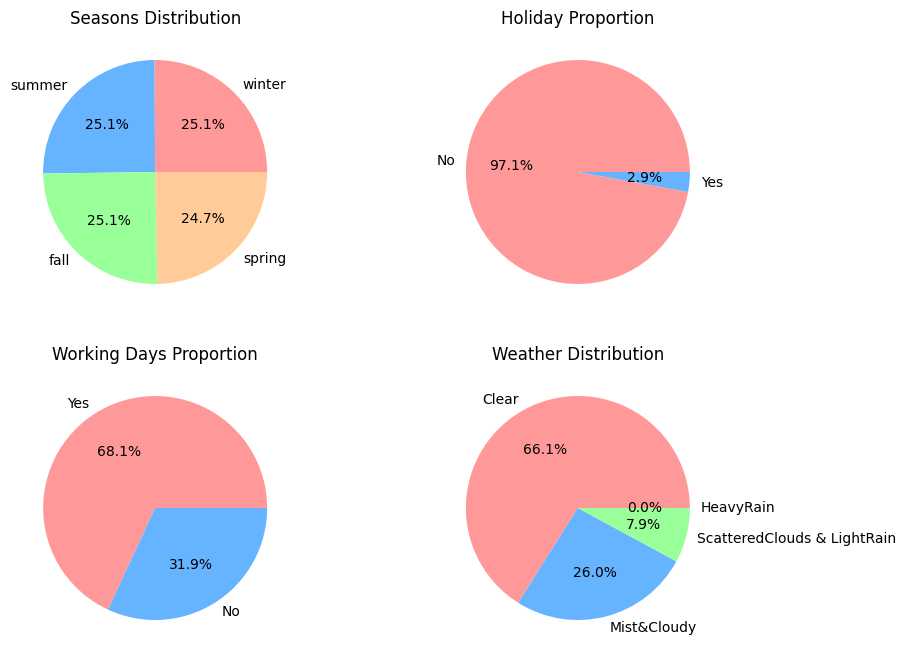

In [19]:
fig,ax=plt.subplots(nrows=2, ncols=2, figsize=(10,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax[0,0].pie(df['season'].value_counts(), labels=df['season'].value_counts().index, autopct="%2.1f%%", colors=colors)
ax[0,0].set_title('Seasons Distribution')
ax[0,1].pie(df['holiday'].value_counts(), labels=df['holiday'].value_counts().index,autopct="%2.1f%%" ,colors=colors)
ax[0,1].set_title('Holiday Proportion')
ax[1,0].pie(df['workingday'].value_counts(), labels=df['workingday'].value_counts().index,autopct="%2.1f%%" ,colors=colors)
ax[1,0].set_title('Working Days Proportion')
ax[1,1].pie(df['weather'].value_counts(), labels=df['weather'].value_counts().index,autopct="%2.1f%%" ,colors=colors)
ax[1,1].set_title('Weather Distribution')
plt.show()

**Insights:**
* Seasons Distribution pie chart shows that all 4 seasons are equally distributed(25% approx)
* Holiday Propotion pie chart shows that in a year there are only 3% holidays. These holidays can be of national and festival holidays.
* Working day Proportion pie chart shows that there are approx 70% working days in a year.
* Weather Distribution pie chart shows the weather distribution. Approx. 92% shows clear and cloudy weather. 8% shows rainy weather.

**Recommendations:**
* Since all seasons are equally distributed, Yulu can ensure availability of bike through out the year, without seasonal bias.
* With only 3% holidays and 70% working days, yulu can launch promotional campaigns on weekends and holidays to encourage usage during leisure time when people are likely to explore recreational activities.
* Since a significant portion of days are working days, Yulu could develop targeted offers or loyalty programs for daily commuters, encouraging them to use Yulu as their preferred mode of transportation to work.



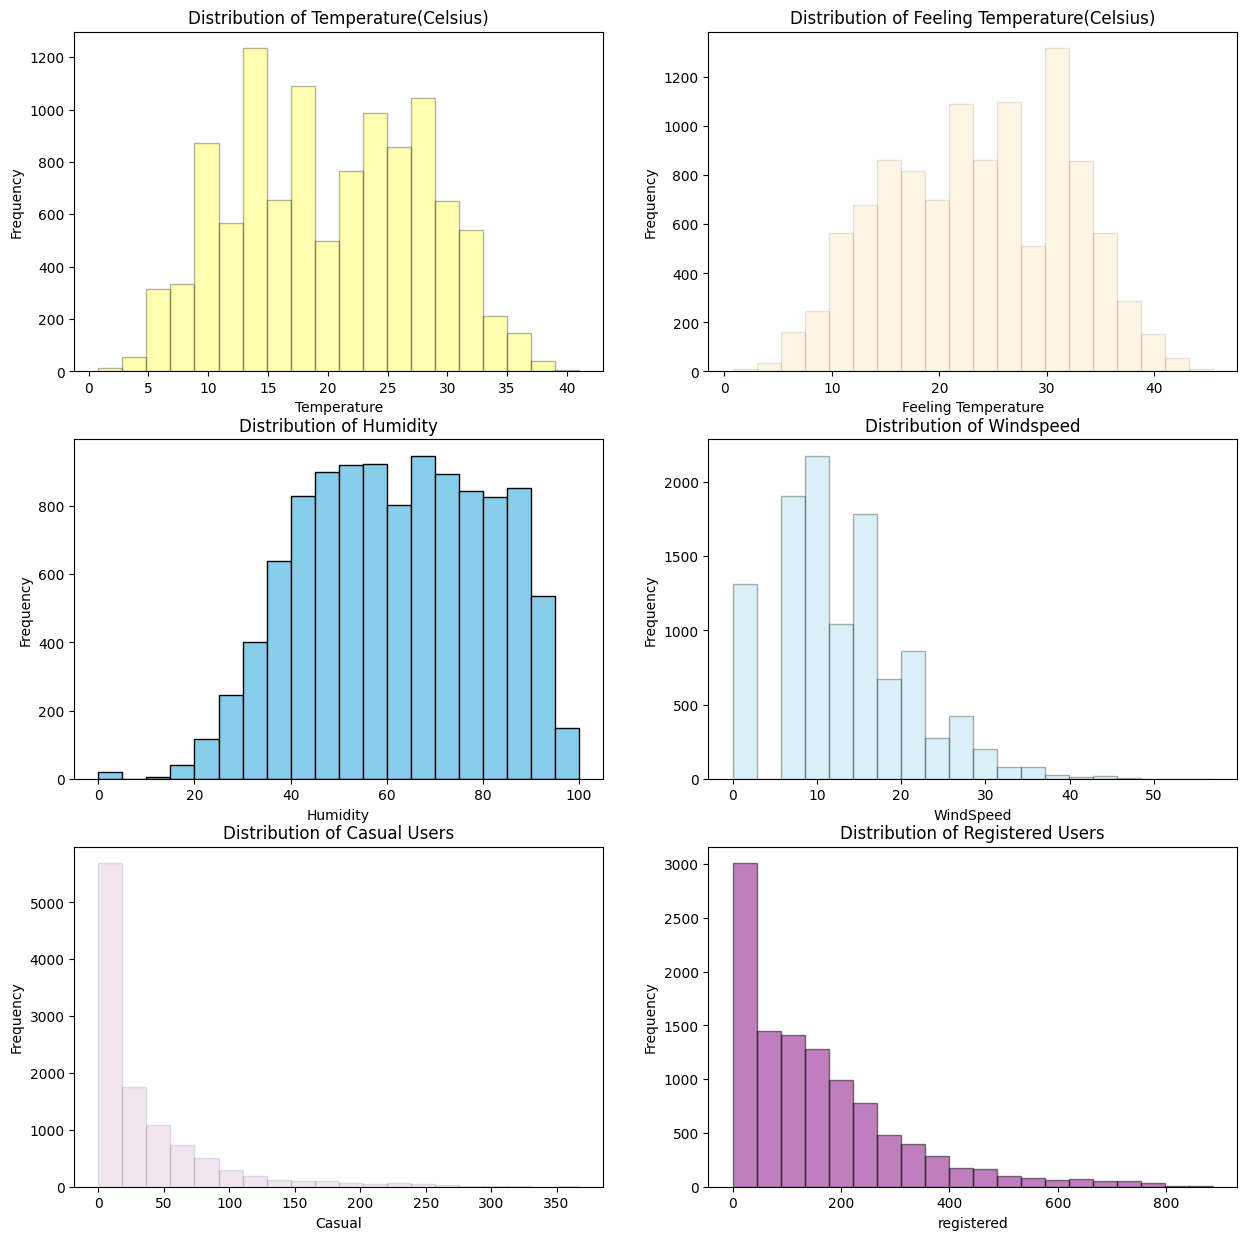

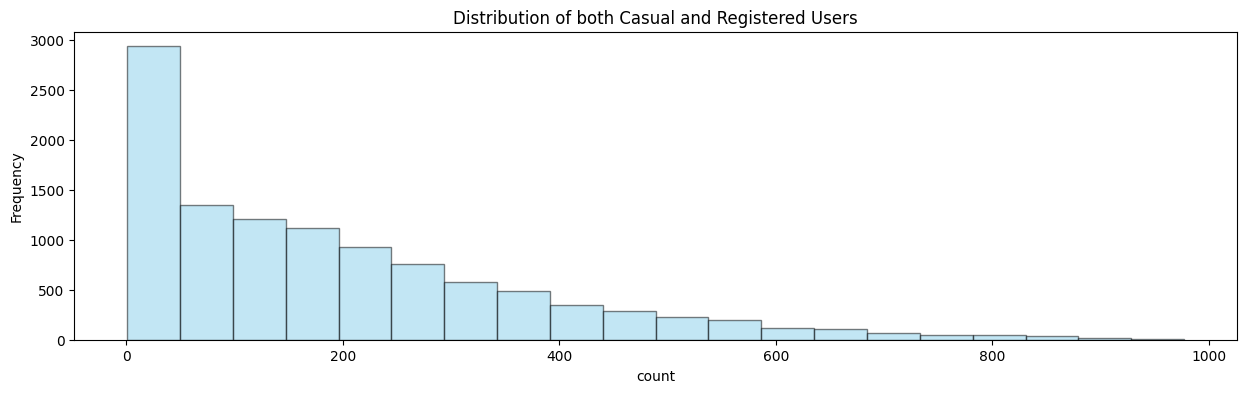

In [22]:
fig,ax= plt.subplots(nrows=3, ncols=2, figsize=(15,15))
ax[0,0].hist(df['temp'], bins=20, color='yellow', edgecolor='black', alpha=0.3)
ax[0,0].set_title('Distribution of Temperature(Celsius)')
ax[0,0].set_xlabel('Temperature')
ax[0,0].set_ylabel('Frequency')
ax[0,1].hist(df['atemp'], bins=20, color='orange', edgecolor='black', alpha=0.1)
ax[0,1].set_title('Distribution of Feeling Temperature(Celsius)')
ax[0,1].set_xlabel('Feeling Temperature')
ax[0,1].set_ylabel('Frequency')
ax[1,0].hist(df['humidity'], bins=20, color='skyblue', edgecolor='black')
ax[1,0].set_title('Distribution of Humidity')
ax[1,0].set_xlabel('Humidity')
ax[1,0].set_ylabel('Frequency')
ax[1,1].hist(df['windspeed'], bins=20, color='skyblue', edgecolor='black', alpha=0.3)
ax[1,1].set_title('Distribution of Windspeed')
ax[1,1].set_xlabel('WindSpeed')
ax[1,1].set_ylabel('Frequency')
ax[2,0].hist(df['casual'], bins=20, color='purple', edgecolor='black', alpha=0.1)
ax[2,0].set_title('Distribution of Casual Users')
ax[2,0].set_xlabel('Casual')
ax[2,0].set_ylabel('Frequency')
ax[2,1].hist(df['registered'], bins=20, color='purple', edgecolor='black', alpha=0.5)
ax[2,1].set_title('Distribution of Registered Users')
ax[2,1].set_xlabel('registered')
ax[2,1].set_ylabel('Frequency')
plt.show()
plt.figure(figsize=(15,4))
plt.hist(df['count'], bins=20, color='skyblue', edgecolor='black', alpha=0.5)
plt.title('Distribution of both Casual and Registered Users')
plt.xlabel('count')
plt.ylabel('Frequency')
plt.show()

**Insights:**
* We can see from the plot that temperature usually lies in the range of 10-35 degree celsius.
* The Feeling Temperature also shows approximately the same distribution, however the values above 30 degree celsius are bit high.
* Humidity generally lies in the range of 40-90.
* Windspeed shows the positive skew (right skew) distribution, indicating windspeed usually between 0-20.
* Distribution of columns 'casual', 'registered' and 'count' shows skewed distribution.

**Recommendations:**
* These temperature, humidity and windspeed distributions can be extremely useful for Yulu as they provides shared electric cycles and extreme weather conditions can affect their business.



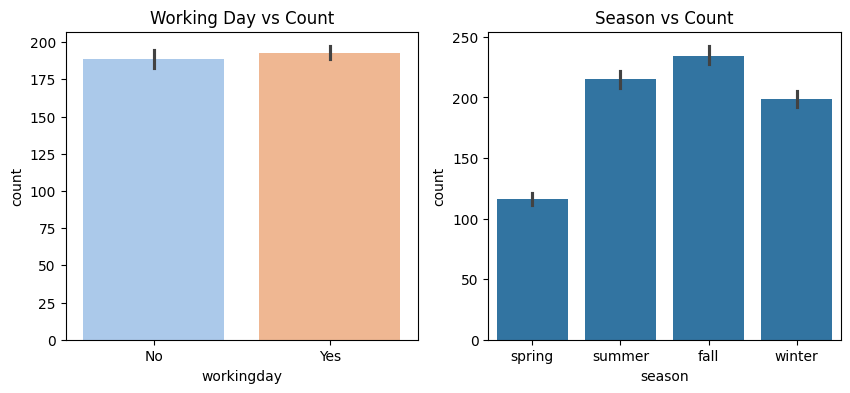

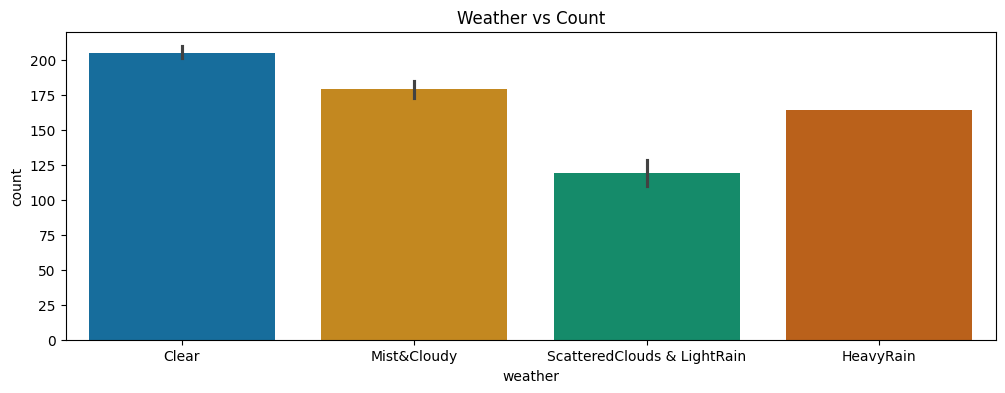

In [21]:
fig,axs= plt.subplots(1,2, figsize=(10,4))
sns.barplot(data=df, x='workingday', y='count', ax=axs[0],palette='pastel')
axs[0].set_title('Working Day vs Count')
sns.barplot(data=df, x='season', y='count', ax=axs[1])
axs[1].set_title('Season vs Count')
plt.show()
plt.figure(figsize=(12,4))
sns.barplot(data=df, x='weather', y='count', palette='colorblind')
plt.title("Weather vs Count")
plt.show()

**Insights:**
* Surprisingly, the count of users opting for rented bicycle is same for working day vs non-working day. We can say that, other factors like weather, season etc. might be more influential  in determining bike rental counts.
* Summer and fall seasons are the seasons in which the count of bike users is high.
* Clear, Mist&Cloudy and HeavyRain weather has a higher count of users than scatteredclouds&LightRain.



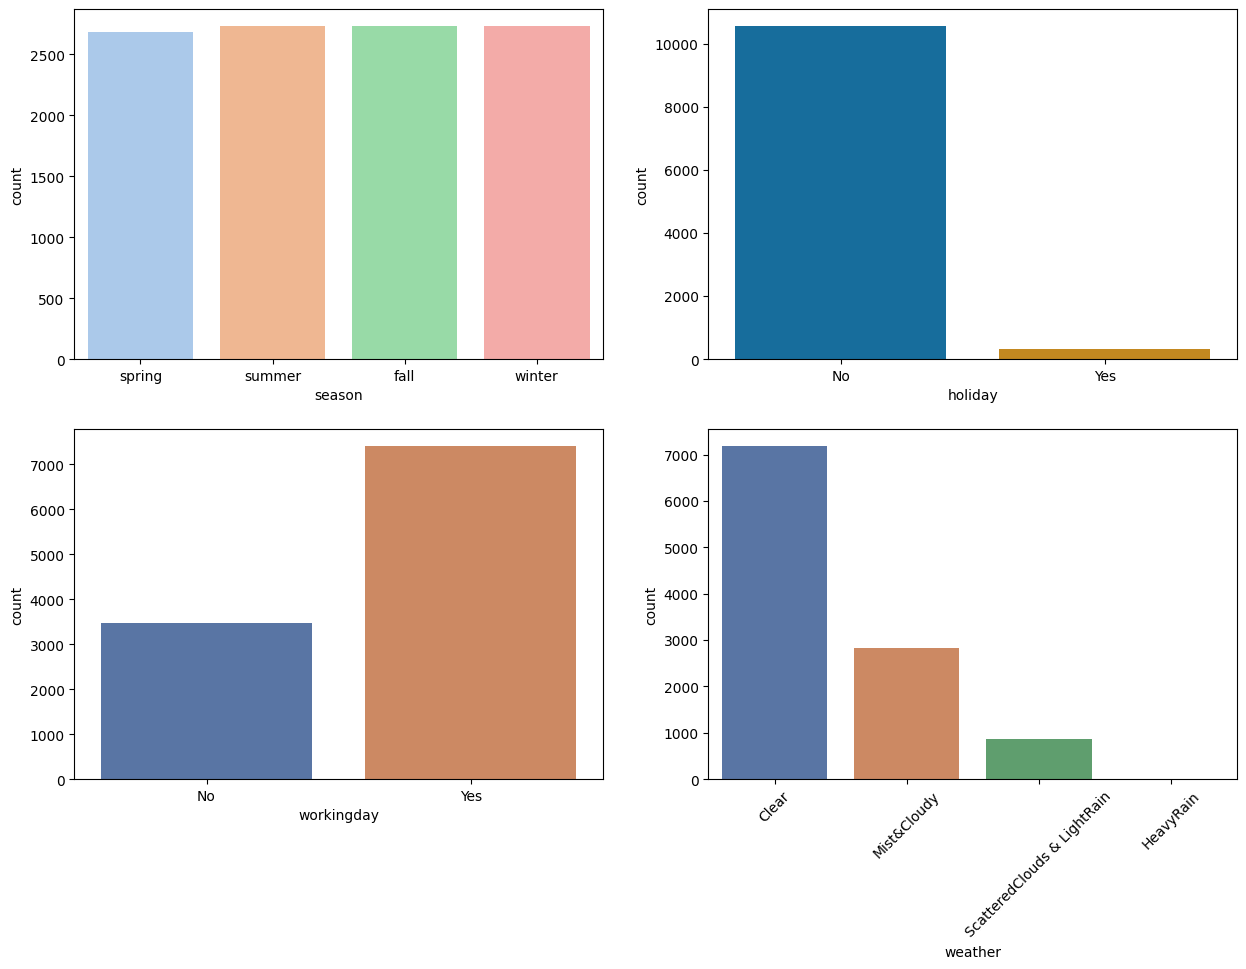

In [23]:
import warnings
warnings.filterwarnings('ignore')
fig,axs= plt.subplots(nrows=2, ncols=2, figsize=(15,10))
custom_palette = ['#FF6347', '#4682B4', '#32CD32']
sns.countplot(data=df, x='season', ax=axs[0,0], palette='pastel')
sns.countplot(data=df, x='holiday', ax=axs[0,1], palette='colorblind')
sns.countplot(data=df, x='workingday', ax=axs[1,0], palette='deep')
sns.countplot(data=df, x='weather', ax=axs[1,1], palette='deep')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45)
plt.show()


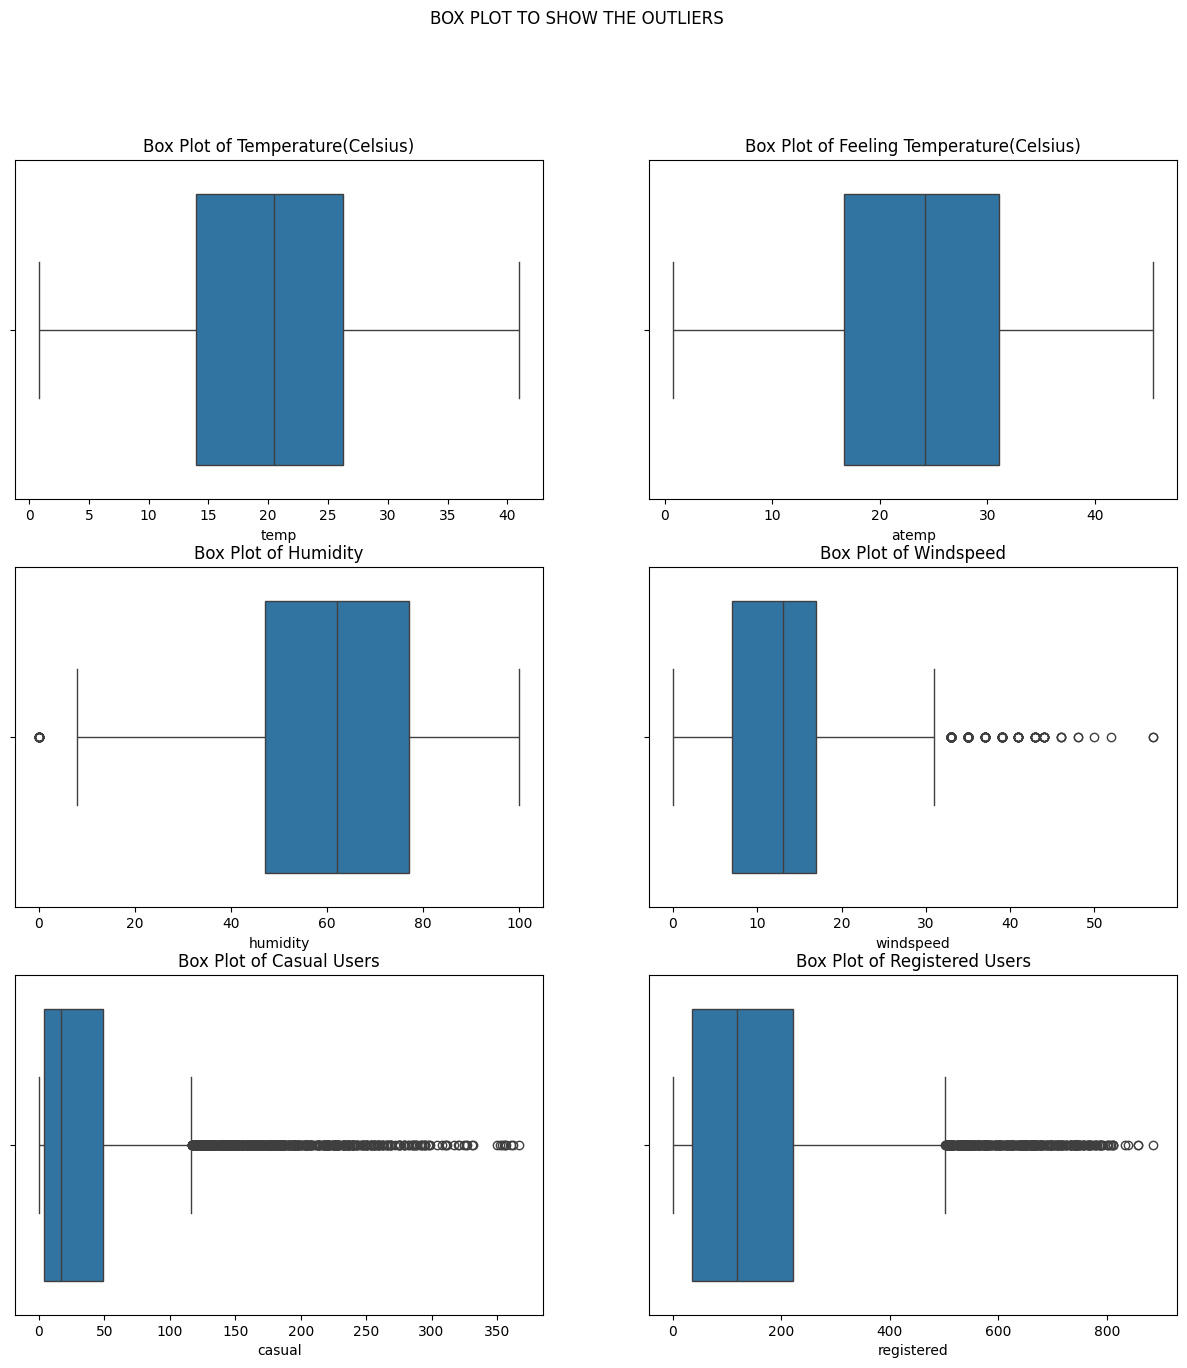

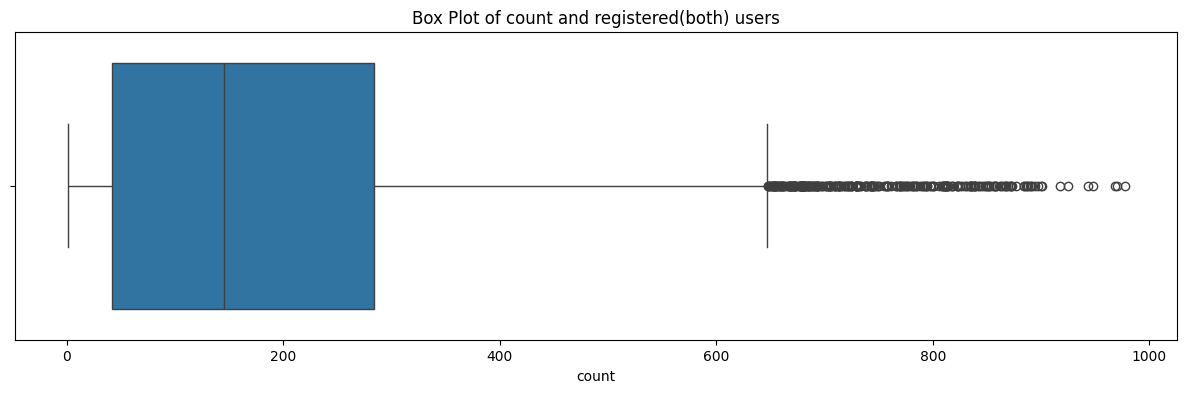

In [24]:
#plt.suptitle("BoxPlot to detect the Outliers")
fig,axs= plt.subplots(nrows=3, ncols=2, figsize=(15,15))
plt.suptitle("BOX PLOT TO SHOW THE OUTLIERS")
custom_palette = ['#FF6347', '#4682B4', '#32CD32']
sns.boxplot(data=df, x='temp', ax=axs[0,0])
axs[0, 0].set_title('Box Plot of Temperature(Celsius)')
sns.boxplot(data=df, x='atemp', ax=axs[0,1])
axs[0, 1].set_title('Box Plot of Feeling Temperature(Celsius)')
sns.boxplot(data=df, x='humidity', ax=axs[1,0])
axs[1, 0].set_title('Box Plot of Humidity')
sns.boxplot(data=df, x='windspeed', ax=axs[1,1])
axs[1, 1].set_title('Box Plot of Windspeed')
sns.boxplot(data=df, x='casual', ax=axs[2,0])
axs[2, 0].set_title('Box Plot of Casual Users')
sns.boxplot(data=df, x='registered', ax=axs[2,1])
axs[2, 1].set_title('Box Plot of Registered Users')
plt.show()
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x='count')
plt.title('Box Plot of count and registered(both) users')
plt.show()

**Insights:**
* From the boxplots we can see clearly see that windspeed, casual, registered and count columns have a lot of outliers.
* The outliers in columns casual, registered and count shows that customers of Yulu Bikes are not consistent users and this is the reason for the decline in their revenue.



In [88]:
# # List of numerical columns to apply outlier removal
# numerical_columns = ['windspeed', 'casual', 'registered', 'count']

# # Function to remove outliers using the IQR method
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Apply the outlier removal function to each column
# for column in numerical_columns:
#     df_iqr = remove_outliers_iqr(df_iqr, column)

In [25]:
# clipping the data for windspeed
columns_to_clip=['windspeed', 'casual', 'registered', 'count']
for column in columns_to_clip:
  lower_bound = df[column].quantile(0.05)
  upper_bound = df[column].quantile(0.95)
  df[f'{column}'] = df[column].clip(lower=lower_bound, upper=upper_bound)

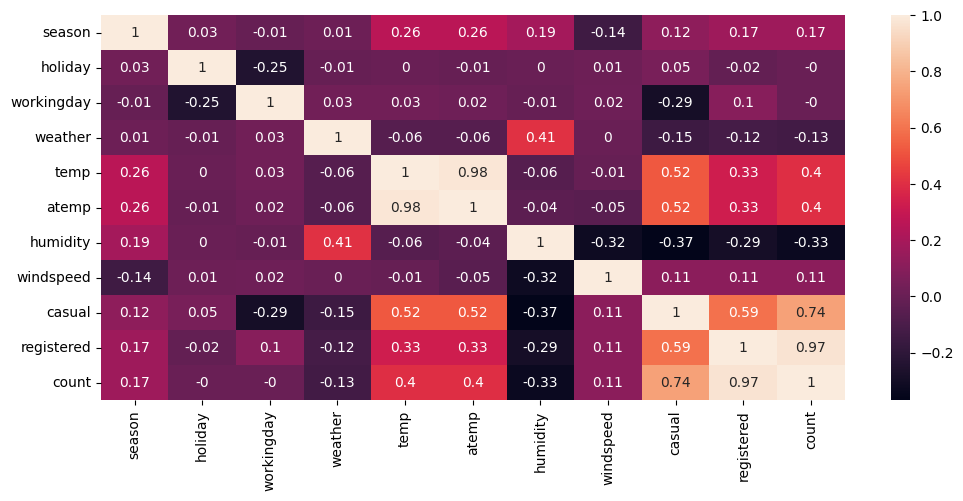

In [26]:
df['season']=df['season'].replace({'spring':1, 'summer':2, 'fall':3, 'winter':4})
df['workingday']=df['workingday'].replace({'Yes': 1,'No' : 0})
df['weather']=df['weather'].replace({'Clear':1, 'Mist&Cloudy':2, 'ScatteredClouds & LightRain':3, 'HeavyRain':4})
df['holiday']=df['holiday'].replace({'No':0, 'Yes':1})

numerical_cols=df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

numerical_cols.corr()
plt.figure(figsize=(12,5))
sns.heatmap(np.round(numerical_cols.corr(),2), annot=True)
plt.show()

**Insights:**
* temp and atemp are highly positively correlated which means that if temp(in celsius) is high atemp(in celsius) i.e. feeling temperature will also be high.
* casual and registered count of users are positively correlated which means that if count of casual users will be high, count of registered users will also be high.
* casual and count is positively correlated which clearly indicates that count is nothing but total registered and casual users.
* registered and count is positively correlated which clearly indicates that count is nothing but total registered and casual users.      
* temp/atemp and casual is positively correrlated, which suggest that if temp is suitable count of casual users will be higher.



In [27]:
df['season']=df['season'].replace({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})
df['workingday']=df['workingday'].replace({1 : 'Yes',0 : 'No'})
df['weather']=df['weather'].replace({1: 'Clear', 2:'Mist&Cloudy', 3:'ScatteredClouds & LightRain', 4:'HeavyRain'})
df['holiday']=df['holiday'].replace({0:'No', 1:'Yes'})

**Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

In [28]:
#Since we have to check whether there is any significant difference between no. of bike rides on weekdays and weekends

#Null Hypothesis (H0):- There is no significant difference between no. of bike rides on weekdays and weekends
#Alternate Hypothesis(H1):- There is a significant difference between no. of bike rides on weekdays and weekends
working_day=df[df['workingday']=='Yes']['count']
non_working_day=df[df['workingday']=='No']['count']

In [29]:
confidence_level= 0.95 #(given)
#significance level -> alpha
alpha= 1-confidence_level

In [30]:
#inporting library for 2 sample independent T-test
from scipy.stats import ttest_ind

In [31]:
t_stat, p_value= ttest_ind(working_day, non_working_day, alternative='two-sided') #since it is a two tailed test
print(p_value)

0.934765416165105


In [32]:
#compare the pvalue to the significance level
if p_value < alpha:
  conclusion= '''Reject the Null Hypothesis. We have evidence to reject null hyothesis.
   There is a significant difference between no. of bike rides on weekdays and weekends'''
else:
  conclusion= '''Failed to reject the Null Hypothesis. We do not have sufficient evidence to reject the null hypthesis.
   There is no significant difference between no. of bike rides on weekdays and weekends'''

print(f'Test statistic: {t_stat}')
print(f'P-value: {p_value}')
print(f'Coclusion: {conclusion}')


Test statistic: -0.08185262080655475
P-value: 0.934765416165105
Coclusion: Failed to reject the Null Hypothesis. We do not have sufficient evidence to reject the null hypthesis. 
   There is no significant difference between no. of bike rides on weekdays and weekends


**Inferences:**
* **Stable Demand:** The consistent bike rental numbers suggest a stable demand for bike rentals throughout the week, regardless of whether it is a weekday or weekend.
* **Usage Patterns:** Bike rentals might be used for purposes that are independent of traditional workweek patterns, such as recreation, commuting, or tourism.
* **Seasonal or Weather Factors:** The stability in rentals might be influenced by seasonal trends or weather conditions that affect bike usage similarly across both weekdays and weekends.

**Conclusions:**
* **Consistent Business Model:** The bike rental business seems to be operating with a model that attracts a steady flow of users regardless of the day of the week. This can be advantageous for forecasting and planning.

**Recommendations:**
* **Customer Segmentation:** Explore other factors, such as demographics, usage purposes, or weather conditions, to understand customer behavior better. This could reveal more nuanced insights into bike rental patterns.
* **Marketing and Promotions:** Consider implementing promotional campaigns or discounts that target both weekdays and weekends equally, as demand does not fluctuate significantly between these periods.


Check if the demand of bicycles on rent is the same for different Weather
conditions?

In [33]:
# Since we want to Check if the demand of bicycles on rent is the same for different Weather conditions
#Since we have 4 categories in weather column, therefore we will go with Anova Test here.
#importing library for one way Anova Test
from scipy.stats import f_oneway

clear_weather=df[df['weather']=='Clear']['count']
cloudy_weather=df[df['weather']=='Mist&Cloudy']['count']
light_rain_weather=df[df['weather']=='ScatteredClouds & LightRain']['count']
heavy_rain_weather=df[df['weather']=='HeavyRain']['count']

In [103]:
#Null Hypothesis (H0):- The mean demand for bicycles on rent is same across all weather conditions.
#Alternate Hypothesis(H1):- The mean demand for bicycles on rent is not the same for at least one weather condition.

In [34]:
#But befor going with Anova, Anova comes with some assumptions:-
#(i) Data should be normally distributed.
#(ii) Data should be independent across each record.
#(iii) There should be equal variance in different groups.

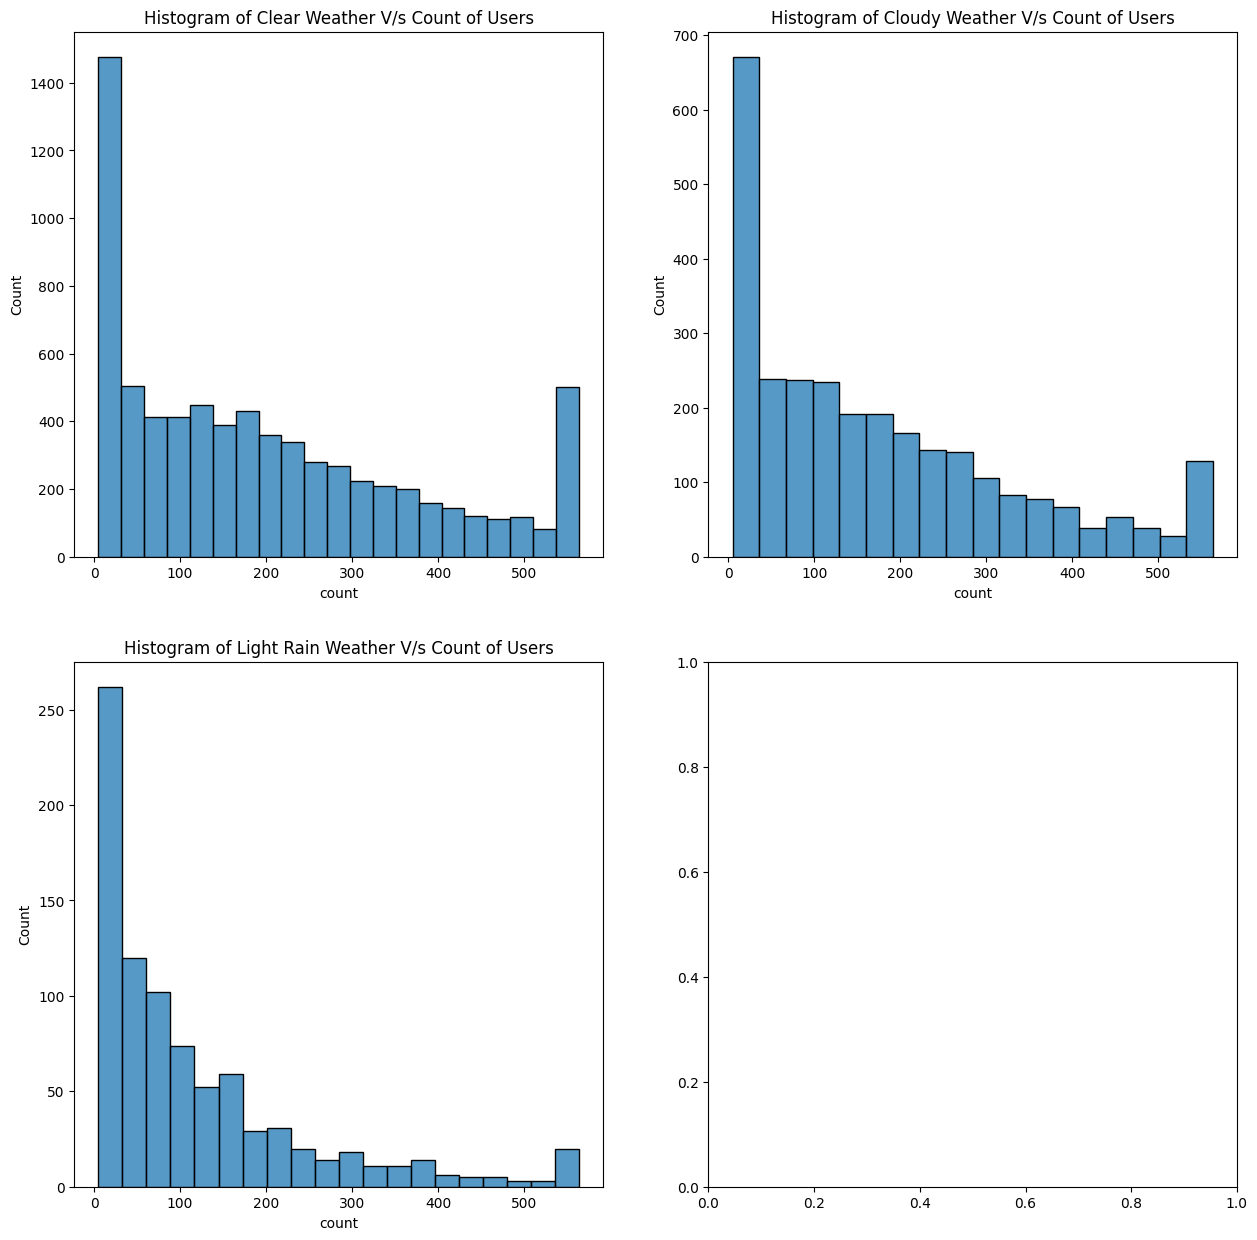

In [34]:
fig, axs= plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.histplot(clear_weather, ax=axs[0,0])
axs[0,0].set_title("Histogram of Clear Weather V/s Count of Users")
sns.histplot(cloudy_weather, ax=axs[0,1])
axs[0,1].set_title("Histogram of Cloudy Weather V/s Count of Users")
sns.histplot(light_rain_weather, ax=axs[1,0])
axs[1,0].set_title("Histogram of Light Rain Weather V/s Count of Users")
#sns.histplot(heavy_rain_weather, ax=axs[1,1])
#axs[1,1].set_title("Histogram of Heavy Rain Weather V/s Count of Users")
plt.show()

In [216]:
df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [35]:
from statsmodels.graphics.gofplots import qqplot

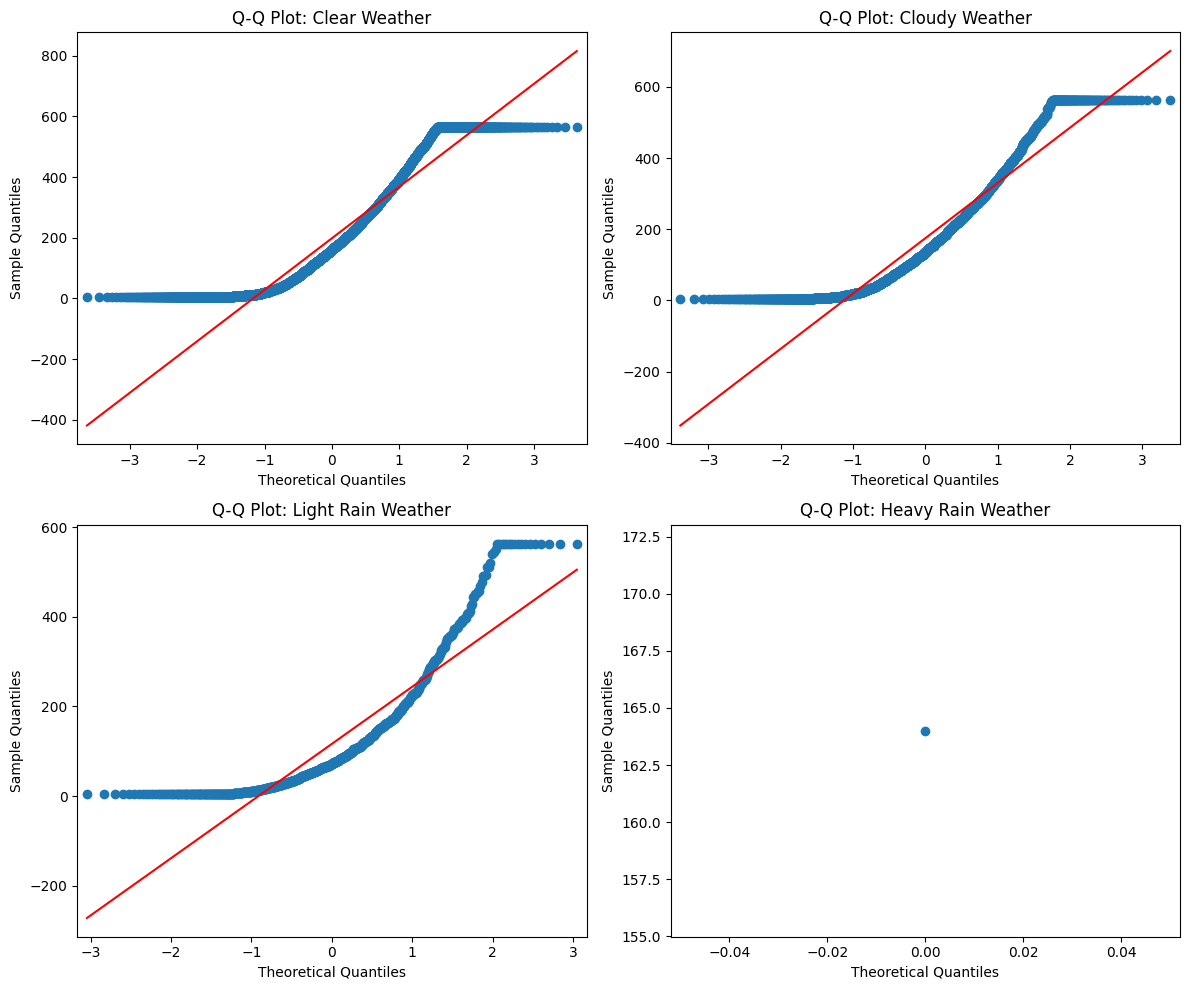

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
qqplot(clear_weather, line='s', ax=axs[0,0])
axs[0, 0].set_title('Q-Q Plot: Clear Weather')
qqplot(cloudy_weather, line='s', ax=axs[0,1])
axs[0, 1].set_title('Q-Q Plot: Cloudy Weather')
qqplot(light_rain_weather, line='s', ax=axs[1,0])
axs[1, 0].set_title('Q-Q Plot: Light Rain Weather')
qqplot(heavy_rain_weather, line='s', ax=axs[1,1])
axs[1, 1].set_title('Q-Q Plot: Heavy Rain Weather')
plt.tight_layout()
plt.show()


*  These plots that data is not normally distributed.



In [37]:
# To check whether the data is gaussian or not we can go with Shapiro-Wilk test.
from scipy.stats import shapiro
#Here, I am taking sample of 100.
#Null Hypothesis:- Data is gaussian.
#Alternate Hypothesis:- Data is not gaussian.
np.random.seed(42)
clear_weather_subset=df[df['weather']=='Clear']['count'].sample(100)
test_stat, pvalue= shapiro(clear_weather_subset)
print(pvalue)


4.003751850126161e-06


In [38]:
alpha= 0.05
if pvalue < alpha:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

Data is not Gaussian


In [39]:
#similarly we will do shapiro wilk test for other also:
np.random.seed(42)
mist_cloudy_weather_subset=df[df['weather']=='Mist&Cloudy']['count'].sample(100)
test_stat, pvalue= shapiro(mist_cloudy_weather_subset)
print(pvalue)

6.271666836908936e-07


In [40]:
alpha= 0.05
if pvalue < alpha:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

Data is not Gaussian


In [41]:
np.random.seed(42)
light_rain_weather_subset=df[df['weather']=='ScatteredClouds & LightRain']['count'].sample(100)
test_stat, pvalue= shapiro(light_rain_weather_subset)
print(pvalue)

2.5319974751318445e-11


In [42]:
alpha= 0.05
if pvalue < alpha:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

Data is not Gaussian


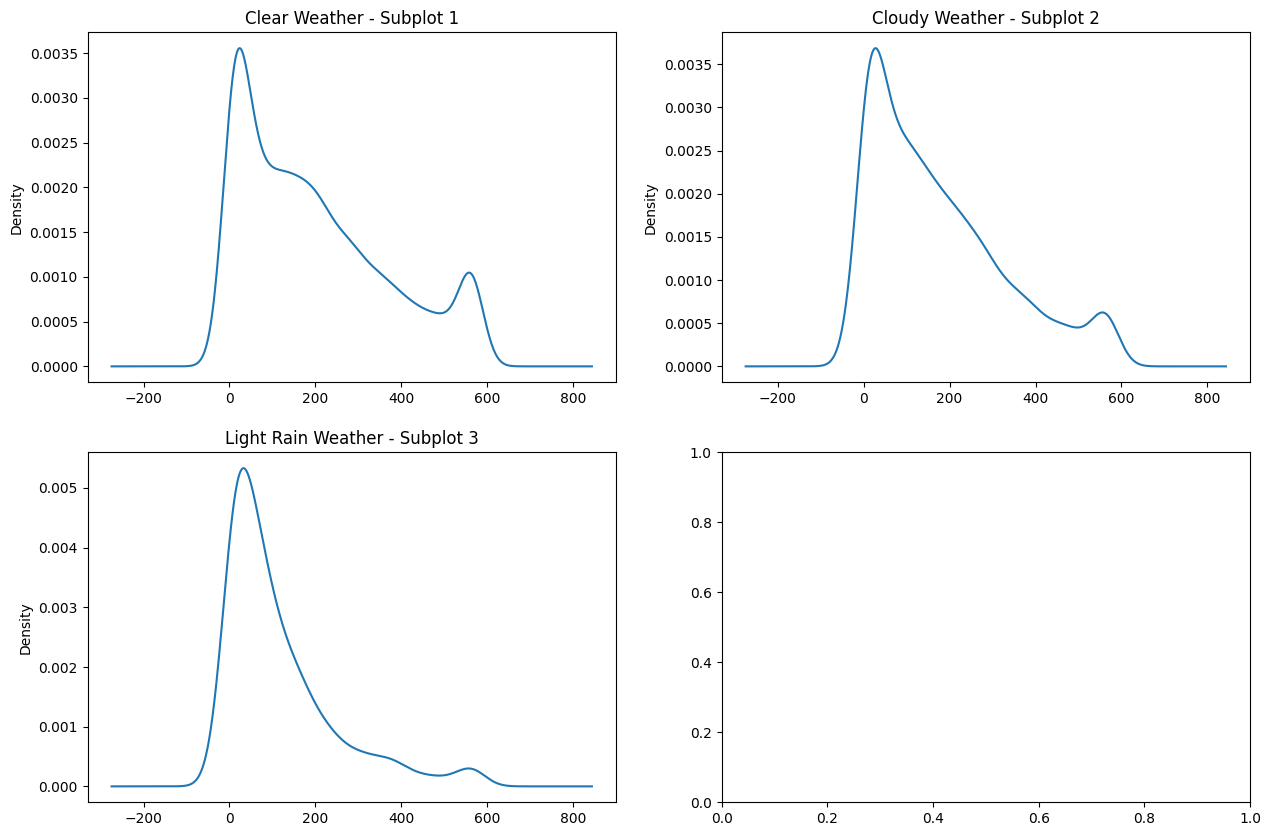

In [43]:
#To check the skewness:-
plt.rcParams['figure.figsize']=[15,10]
fig, axs = plt.subplots(2, 2, sharex=False)
clear_weather.plot(kind='density', ax=axs[0,0] ,title='Clear Weather - Subplot 1')
cloudy_weather.plot(kind='density', ax=axs[0, 1], title='Cloudy Weather - Subplot 2')
light_rain_weather.plot(kind='density', ax=axs[1, 0], title='Light Rain Weather - Subplot 3')
plt.show()
#heavy_rain_weather.plot(kind='density', ax=axs[1, 1], title='Cloudy Weather - Subplot 2')

In [44]:
print(clear_weather.skew())
print(cloudy_weather.skew())
print(light_rain_weather.skew())
print(heavy_rain_weather.skew())

0.736322461193618
0.9296845618420533
1.7013286534371677
nan


* Clear Weather (0.736): The skewness is positive, which suggests that the distribution of bike rentals on clear weather days has a longer tail on the right.
* Cloudy Weather (0.929): The skewness is also positive but slightly higher than for clear weather. This indicates a more pronounced right tail in the distribution.
* Light Rain Weather (1.70): The high positive skewness indicates a significant rightward skew. This means that on days with light rain, while most bike rental counts are low, there are some days with exceptionally high rentals.




In [45]:
#Now we will check for Kurtosis:
print(clear_weather.kurt())
print(cloudy_weather.kurt())
print(light_rain_weather.kurt())
print(heavy_rain_weather.kurt())

-0.525921604740589
0.010387794528335714
2.6489280099549397
nan


In [46]:
# As we can see form above analysis, that assumptions of Anova hasn't met here, therefore we will go with Kruskal Test here.

# importing library of kruskal
from scipy.stats import kruskal

#Null Hypothesis (H0):- The mean demand for bicycles on rent is same across all weather conditions.
#Alternate Hypothesis(H1):- The mean demand for bicycles on rent is not the same for at least one weather condition.

stat, pvalue= kruskal(clear_weather, cloudy_weather, light_rain_weather, heavy_rain_weather)
print(pvalue)

3.900417263983396e-44


In [47]:
alpha=0.05
if pvalue < alpha:
  print("Reject the null hypothesis i.e. The mean demand for bicycles on rent is not the same for at least one weather condition.")
else:
  print("Failed to reject the null hypothesis i.e. The mean demand for bicycles on rent is same across all weather conditions.")

Reject the null hypothesis i.e. The mean demand for bicycles on rent is not the same for at least one weather condition.


**Inferences & Conclusions:**
* **Weather Significantly Affects Bicycle Demand:** The result suggests that weather conditions play a significant role in determining the demand for bicycles. This could mean that certain weather conditions are more favorable for renting bicycles, while others may deter people from doing so.
* **Specific Weather Conditions May Drive Higher Demand:** Clear or Cloudy weather have significantly higher demand compared to rainy conditions.



**Recommendations:**
* **Opportunity for Targeted Marketing:** With the understanding that weather influences demand, Yulu could develop targeted marketing strategies. For instance, they might offer promotions or discounts during weather conditions that typically see lower demand to encourage more rentals.
* **Operational Planning and Resource Allocation:** Yulu can use this information and optimize its operations. Like, during weather conditions with higher demand, they can ensure that more bicycles are available. And during weather conditions with lower demand, they might reduce the number of bicycles in certain areas.
* **Potential for weather responsive pricing:** The company might consider dynamic pricing strategies based on weather conditions. For example prices can be adjusted to reflect the increased demand during favourable weather conditions and offer discounts during less favorable conditions.
* **Seasonal and Weather-Based Demand Forecasting:** by incorporating weather data, Yulu can make more accurate predictions about future demand, helping in better resource allocation and operational efficiency.



**Check if the demand of bicycles on rent is the same for different Seasons?**

In [78]:
# Since we have to check, whether the demand of bicycles on rent is same for different seasons or not
# Season is categorical (here more than 2 categories) and count is continuous, so we have to go with Anova here.
# But befor going with Anova, lets check for assumptions of Anova.
# If assumptions are met, we will go with Anova otherwise we will go with Kruskal.

In [ ]:
#Assumptions of Anova:-
#(i) Data should be normally distributed.
#(ii) Data should be independent across each record.
#(iii) There should be equal variance in different groups.

* Null Hypothesis: The mean demand for bicycles on rent is same across all seasons.
* Alternate Hypothesis: The mean demand for bicycles on rent is significantly different for atleast one season.





In [48]:
df['season'].unique()
#df.head()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [49]:
spring_season=df[df['season']=='spring']['count']
summer_season=df[df['season']=='summer']['count']
fall_season=df[df['season']=='fall']['count']
winter_season=df[df['season']=='winter']['count']

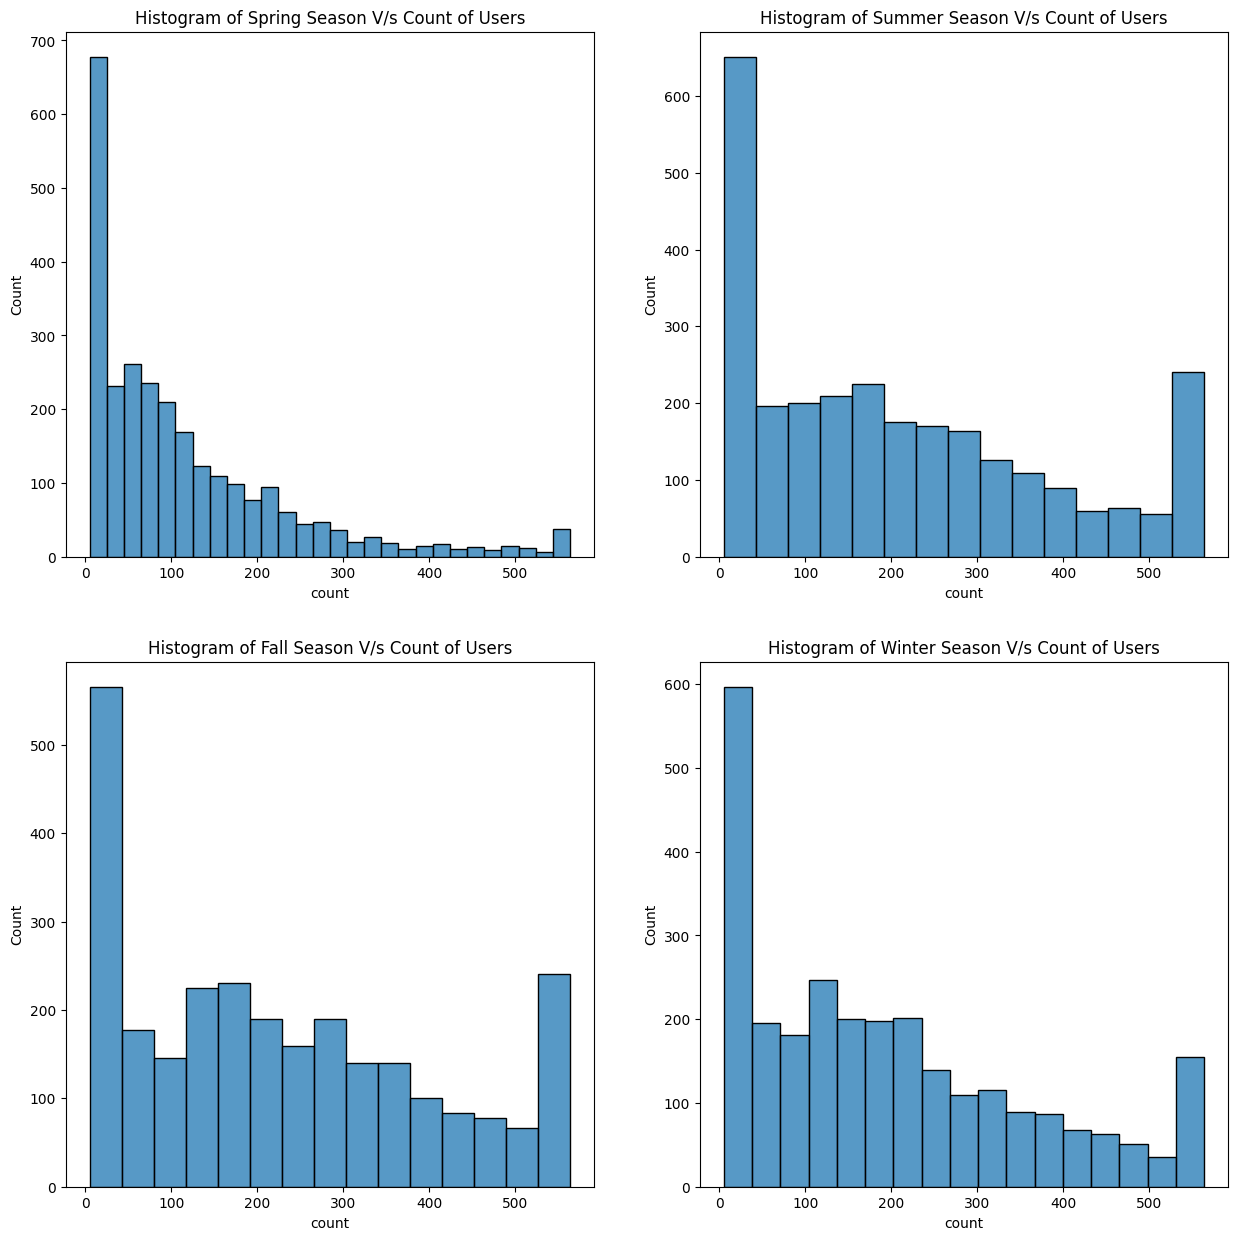

In [50]:
fig, axs= plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.histplot(spring_season, ax=axs[0,0])
axs[0,0].set_title("Histogram of Spring Season V/s Count of Users")
sns.histplot(summer_season, ax=axs[0,1])
axs[0,1].set_title("Histogram of Summer Season V/s Count of Users")
sns.histplot(fall_season, ax=axs[1,0])
axs[1,0].set_title("Histogram of Fall Season V/s Count of Users")
sns.histplot(winter_season, ax=axs[1,1])
axs[1,1].set_title("Histogram of Winter Season V/s Count of Users")
plt.show()

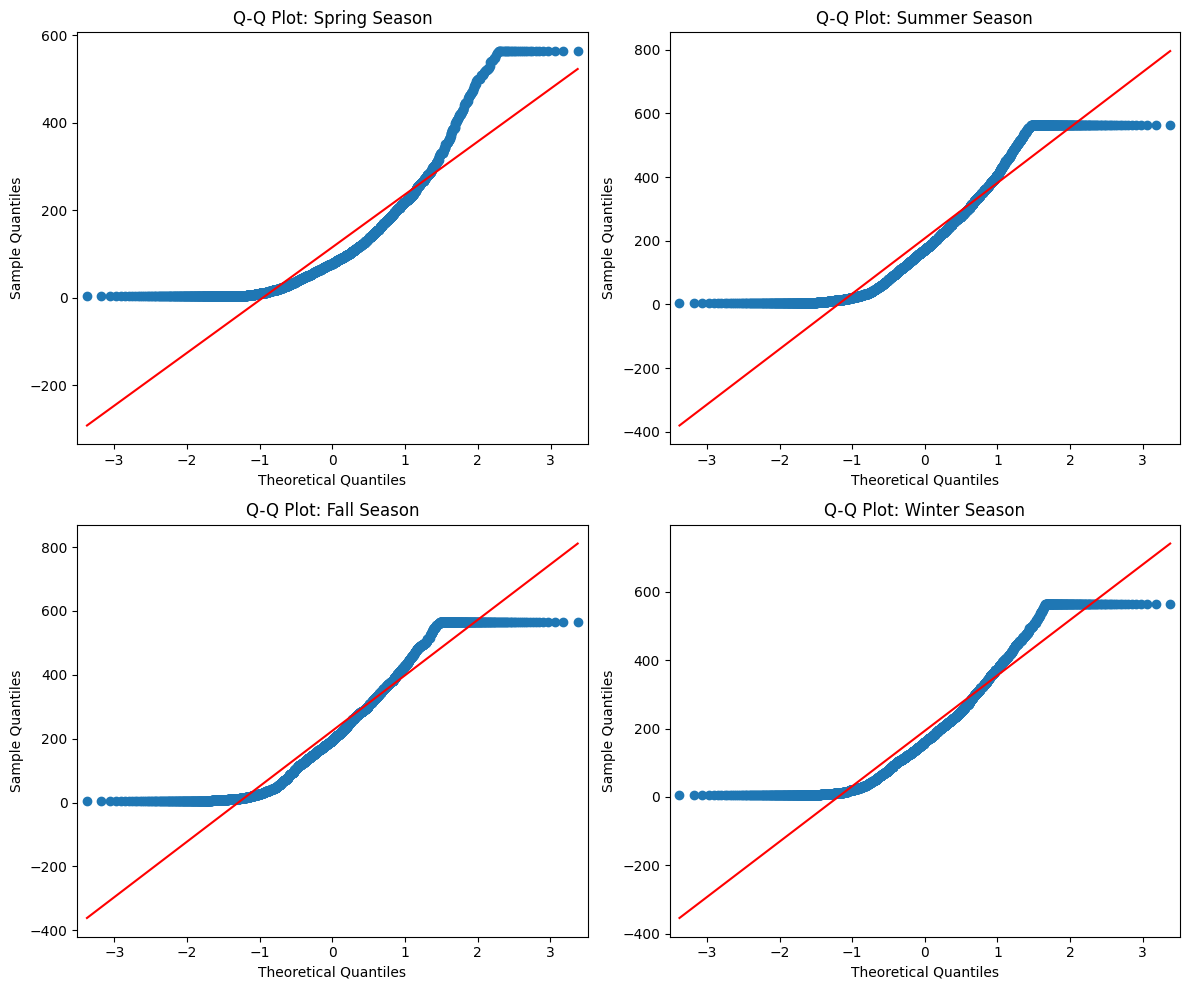

In [51]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
qqplot(spring_season, line='s', ax=axs[0,0])
axs[0, 0].set_title('Q-Q Plot: Spring Season')
qqplot(summer_season, line='s', ax=axs[0,1])
axs[0, 1].set_title('Q-Q Plot: Summer Season')
qqplot(fall_season, line='s', ax=axs[1,0])
axs[1, 0].set_title('Q-Q Plot: Fall Season')
qqplot(winter_season, line='s', ax=axs[1,1])
axs[1, 1].set_title('Q-Q Plot: Winter Season')
plt.tight_layout()
plt.show()

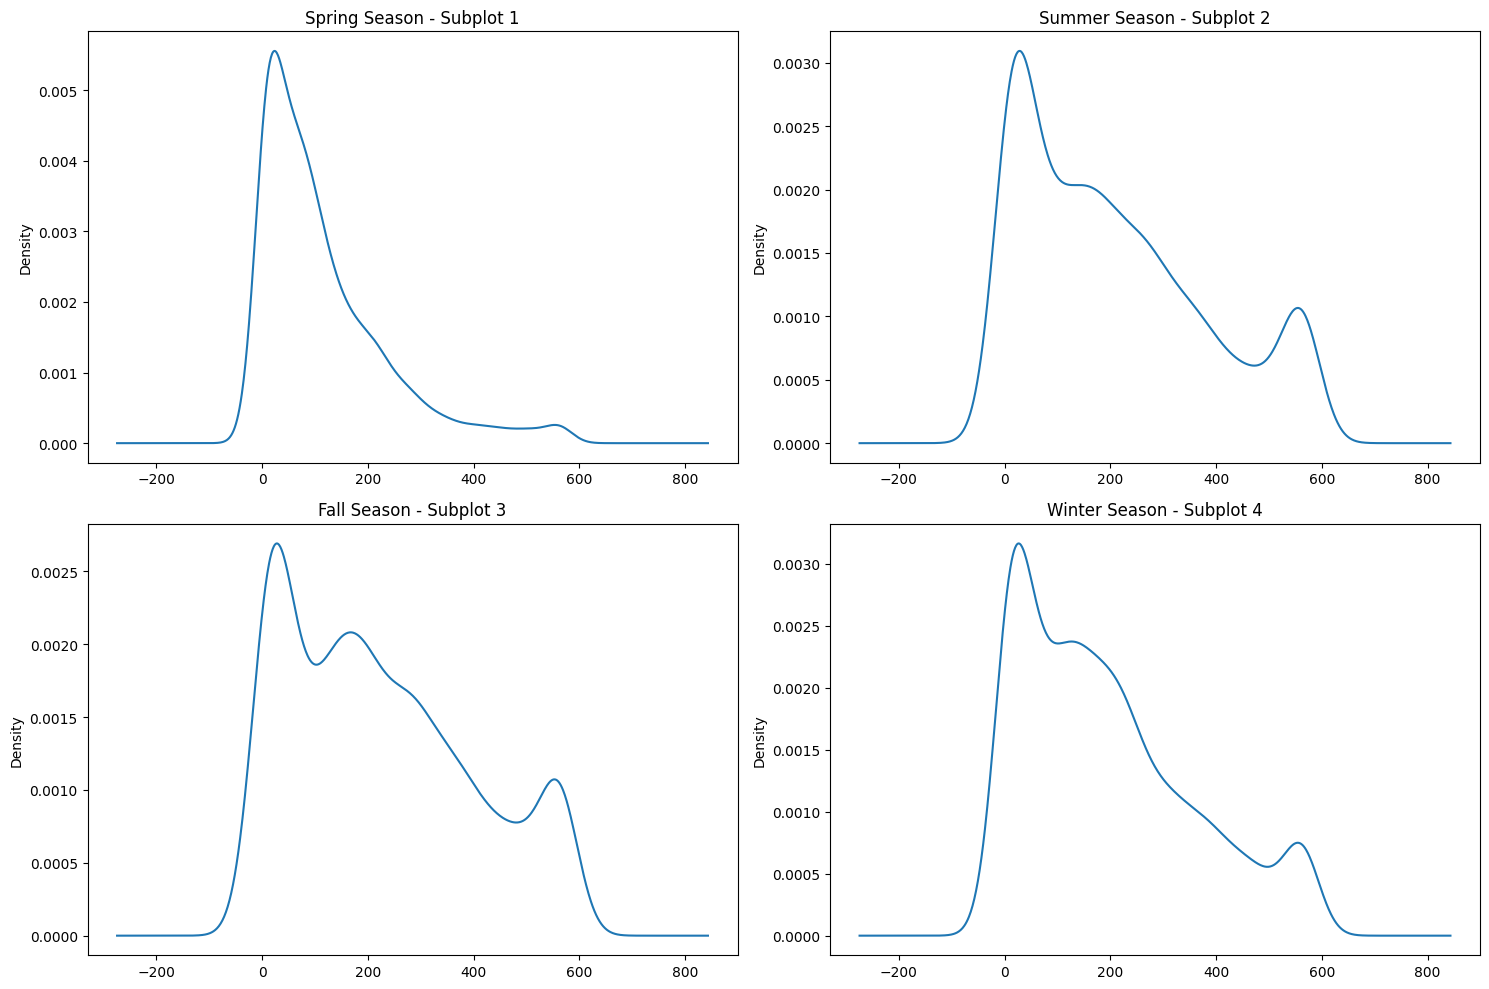

In [52]:
#to check the skewness:-
plt.rcParams['figure.figsize']=[15,10]
fig, axs = plt.subplots(2, 2, sharex=False)
spring_season.plot(kind='density', ax=axs[0,0] ,title='Spring Season - Subplot 1')
summer_season.plot(kind='density', ax=axs[0, 1], title='Summer Season - Subplot 2')
fall_season.plot(kind='density', ax=axs[1, 0], title='Fall Season - Subplot 3')
winter_season.plot(kind='density', ax=axs[1, 1], title='Winter Season - Subplot 4')
plt.tight_layout()
plt.show()

In [53]:
print(spring_season.skew())
print(summer_season.skew())
print(fall_season.skew())
print(winter_season.skew())

1.6642455845120148
0.6617930872787819
0.49543375143137586
0.758982932008488


**Insights:**
* When skewness > 0, the distribution has a longer tail on the right side. This suggests that there are more extreme higher values.
* Spring Season (1.664): Highly positively skewed, indicating that the distribution has long right tail with more extreme high values.
* Summer Season (0.662): Moderately positively skewed, indicating a slight right skew with some higher values.
* Fall Season (0.495): Slightly positively skewed, indicating a distribution close to symmetric but still with some higher values.
* Winter Season (0.759): Moderately positively skewed, indicating a slight right skew with some higher values.


In [54]:
#Now we will check for Kurtosis:
print(spring_season.kurt())
print(summer_season.kurt())
print(fall_season.kurt())
print(winter_season.kurt())

2.767843608604467
-0.6658039130331308
-0.8544257474126695
-0.37327715780077897


In [55]:
# To check whether the data is gaussian or not we can go with Shapiro-Wilk test.
from scipy.stats import shapiro
#Here, I am taking sample of 100.
#Null Hypothesis:- Data is gaussian.
#Alternate Hypothesis:- Data is not gaussian.
np.random.seed(42)
spring_season_subset=df[df['season']=='spring']['count'].sample(100)
test_stat, pvalue= shapiro(spring_season_subset)
print(pvalue)

2.4844806077246804e-10


In [56]:
alpha= 0.05
if pvalue < alpha:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

Data is not Gaussian


In [57]:
# Similarly we will check whether the data is gaussian or not for other seasons also:
#Here, I am taking sample of 100.
#Null Hypothesis:- Data is gaussian.
#Alternate Hypothesis:- Data is not gaussian.
np.random.seed(42)
summer_season_subset=df[df['season']=='summer']['count'].sample(100)
test_stat, pvalue= shapiro(summer_season_subset)
print(pvalue)

1.798611666346722e-06


In [58]:
alpha= 0.05
if pvalue < alpha:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

Data is not Gaussian


In [59]:
#Here, I am taking sample of 100.
#Null Hypothesis:- Data is gaussian.
#Alternate Hypothesis:- Data is not gaussian.
np.random.seed(42)
fall_season_subset=df[df['season']=='fall']['count'].sample(100)
test_stat, pvalue= shapiro(fall_season_subset)
print(pvalue)

8.197373437122157e-05


In [60]:
alpha= 0.05
if pvalue < alpha:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

Data is not Gaussian


In [61]:
#Here, I am taking sample of 100.
#Null Hypothesis:- Data is gaussian.
#Alternate Hypothesis:- Data is not gaussian.
np.random.seed(42)
winter_season_subset=df[df['season']=='winter']['count'].sample(100)
test_stat, pvalue= shapiro(winter_season_subset)
print(pvalue)

1.5335952356513076e-05


In [62]:
alpha= 0.05
if pvalue < alpha:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

Data is not Gaussian


In [63]:
# Now to check whether variance is equal or not we have Levene's Test

#Null hypothesis: Variances are equal.
#Alternate hypothesis: Variances are not equal

from scipy.stats import levene #importing the library

levene_stat, pvalue= levene(spring_season, summer_season, fall_season, winter_season)
print(pvalue)

3.684749131629985e-132


In [64]:
alpha=0.05
if pvalue < alpha:
  print("Reject the null hypothesis i.e. Variances are not equal.")
else:
  print("Failed to reject the null hypothesis i.e.Variances are equal.")

Reject the null hypothesis i.e. Variances are not equal.


In [65]:
# As we can see form above analysis, that assumptions of Anova hasn't met here, therefore we will go with Kruskal Test here.

# importing library of kruskal
from scipy.stats import kruskal

#Null Hypothesis (H0):- The mean demand for bicycles on rent is same across all seasons.
#Alternate Hypothesis(H1):- The mean demand for bicycles on rent is not the same for at least one season.

stat, pvalue= kruskal(spring_season, summer_season, fall_season, winter_season)
print(pvalue)

2.4688288437668016e-149


In [66]:
alpha=0.05
if pvalue < alpha:
  print("Reject the null Hypothesis i.e. The mean demand for bicycles on rent is not the same for at least one season.")
else:
  print("Failed to reject the null hypothesis i.e. The mean demand for bicycles on rent is same across all seasons")

Reject the null Hypothesis i.e. The mean demand for bicycles on rent is not the same for at least one season.


**Inferences:**
* **Seasonal Variation in Demand:** There is a significant difference in the average demand for bicycles across different seasons.
* **Season Specific Factors:** Factors associated with different seasons such as weather conditions, holidays and temperature may influence bike rental demand. For example, demand might be higher in spring and summer season due to pleasent weather and lower in winter due to cold and unpleasant conditions.

**Recommendations:**
* **Targeted Marketing Strategies:** The company cosider implementing season specific marketing strategies. For example, promotions or discounts during seasons with lower demand could help boost rentals, while maximizing resouces during high demand seasons could enhance customer satisfaction and revenue.

* **Resource Allocation:** Yulu could allocate more bicycles and staff during peak seasons to meet the higher demand, while reducing resources in seasons with lower demand to optimize costs.

**Conclusion:**
* The evidence suggests that demand for bicycle rentals varies significantly across seasons. This variability should be accounted for in business planning, marketing, and operational strategies to optimize both customer satisfaction and profitability. Understanding these seasonal trends allows for better forecasting and more efficient management of resources throughout the year.



**Check if the Weather conditions are significantly different during different Seasons?**

In [ ]:
#Null hypothesis: Weather Conditions are same across all seasons.
#Alternate Hypothsis: Weather conditions are significantly different across different seasons.

In [67]:
df_encoded = pd.get_dummies(df, columns=['weather', 'season'], drop_first=True)
print(df_encoded.head())

             datetime holiday workingday  temp   atemp  humidity  windspeed  \
0 2011-01-01 00:00:00      No         No  9.84  14.395        81        0.0   
1 2011-01-01 01:00:00      No         No  9.02  13.635        80        0.0   
2 2011-01-01 02:00:00      No         No  9.02  13.635        80        0.0   
3 2011-01-01 03:00:00      No         No  9.84  14.395        75        0.0   
4 2011-01-01 04:00:00      No         No  9.84  14.395        75        0.0   

   casual  registered  count      time  time_in_seconds time_bins  \
0       3          13   16.0  00:00:00                0     night   
1       8          32   40.0  01:00:00             3600     night   
2       5          27   32.0  02:00:00             7200     night   
3       3          10   13.0  03:00:00            10800     night   
4       0           4    5.0  04:00:00            14400     night   

   weather_HeavyRain  weather_Mist&Cloudy  \
0              False                False   
1              False

In [68]:
df_encoded

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,time,time_in_seconds,time_bins,weather_HeavyRain,weather_Mist&Cloudy,weather_ScatteredClouds & LightRain,season_spring,season_summer,season_winter
0,2011-01-01 00:00:00,No,No,9.84,14.395,81,0.0000,3,13,16.0,00:00:00,0,night,False,False,False,True,False,False
1,2011-01-01 01:00:00,No,No,9.02,13.635,80,0.0000,8,32,40.0,01:00:00,3600,night,False,False,False,True,False,False
2,2011-01-01 02:00:00,No,No,9.02,13.635,80,0.0000,5,27,32.0,02:00:00,7200,night,False,False,False,True,False,False
3,2011-01-01 03:00:00,No,No,9.84,14.395,75,0.0000,3,10,13.0,03:00:00,10800,night,False,False,False,True,False,False
4,2011-01-01 04:00:00,No,No,9.84,14.395,75,0.0000,0,4,5.0,04:00:00,14400,night,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,No,Yes,15.58,19.695,50,26.0027,7,329,336.0,19:00:00,68400,evening,False,False,False,False,False,True
10882,2012-12-19 20:00:00,No,Yes,14.76,17.425,57,15.0013,10,231,241.0,20:00:00,72000,evening,False,False,False,False,False,True
10883,2012-12-19 21:00:00,No,Yes,13.94,15.910,61,15.0013,4,164,168.0,21:00:00,75600,evening,False,False,False,False,False,True
10884,2012-12-19 22:00:00,No,Yes,13.94,17.425,61,6.0032,12,117,129.0,22:00:00,79200,evening,False,False,False,False,False,True


* Since weather and season both are categorical variables, therefore will go with Chi-square Test.

In [69]:
df['season']=df['season'].replace({'spring':1, 'summer':2, 'fall':3, 'winter':4})
df['weather']=df['weather'].replace({'Clear':1, 'Mist&Cloudy':2, 'ScatteredClouds & LightRain':3, 'HeavyRain':4})
#df.head(2)

In [70]:
vals= pd.crosstab(index=df['season'], columns=df['weather'])
vals

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [71]:
from scipy.stats import chi2_contingency

In [72]:
pvalue=chi2_contingency(vals)[1]
print(pvalue)

1.549925073686492e-07


In [73]:
alpha=0.05
if pvalue < alpha:
  print("Reject the Null Hypothesis i.e. Weather conditions are significantly different across different seasons.")
else:
  print("Failed to reject the null hypothesis i.e. Weather Conditions are same across all seasons.")

Reject the Null Hypothesis i.e. Weather conditions are significantly different across different seasons.


**Insights:**
* **Seasonal Impact on weather:** The significant difference in weather conditions across seasons implies that each season has distinct weather patterns. There can be different or a combination of weather conditions in a single season. For instance, summer might have clear weather, while winter could have more cloudy or rainy conditions.
* **Variability in User Experience:** The distinct weather conditions across seasons could lead to variability in user experience.

**Conclusion:**
* **Seasonality Matters:** Weather conditions are not uniform throughout the year but vary significantly with seasons. This means that any service or product that is affected by weather, such as outdoor transportation, should account for these seasonal variations in their planning and operations.

**Recommendations:**
* **Season Specific Strategies:** Yulu should consider implementing season specific strategies. For example, increasing bike availability during clear weather seasons or offering discounts during rainy/extreme weather conditions to encourage usage.
* **Predictive Maitenance:** Yulu could plan its maintenance schedules to align with seasonal weather changes. For example, more frequent checks and maintenance during season with harsh weather conditions like monsoons can ensure that fleet remains in good condition.
* **User Communiaction:** Yulu should communicate weater related updates and tips to users, such as recommending routes or offering safety tips during adverse weather conditions. This can improve user satisfaction and safety.
* **Dynamic Pricing:** Dynamic Pricing can be implemented based on weather conditions. For example, lower prices during less favourable conditions to attract more users and higher prices when demand is likely to peak during pleasant weather.

**Extra Recommendatios:**
* Yulu Bikes setup can be installed at hotspot areas like near corporate offices, coaching centres (like Kota city in India), big hospitals (like AIIMS) etc. This will lead to visibility of their brand and will make a product appeal among the users.
* First few rides can be given free or at a very high discounted rates for new users. Through this, company can add new users and the new users will also get the feel of the product(bikes).
* Monthly pass scheme can be launched for registered users. As the registered users would be daily/frequent users, they can get extra offers or discounts so that Yulu is always ahead of its competitors.
* Through Education and awareness also, Yulu can increase its revenue. If people are made educated that through riding on Yulu rented bikes, they are conserving the environment and can save their precious time by avoiding traffics, this will definitely boost their sales.   